In [9]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=122860 sha256=8dacf43d73746216122f63cb63691768d6fdf117a07a39910cae0904a95a9745
  Stored in directory: /tmp/pip-ephem-wheel-cache-3g7evijc/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos_nodes.sg",
                      path_links=path_directory + "erdos_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  6.0
Nb of links :  4
Nb of segmented links :  4.0
Nb of event times :  8


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


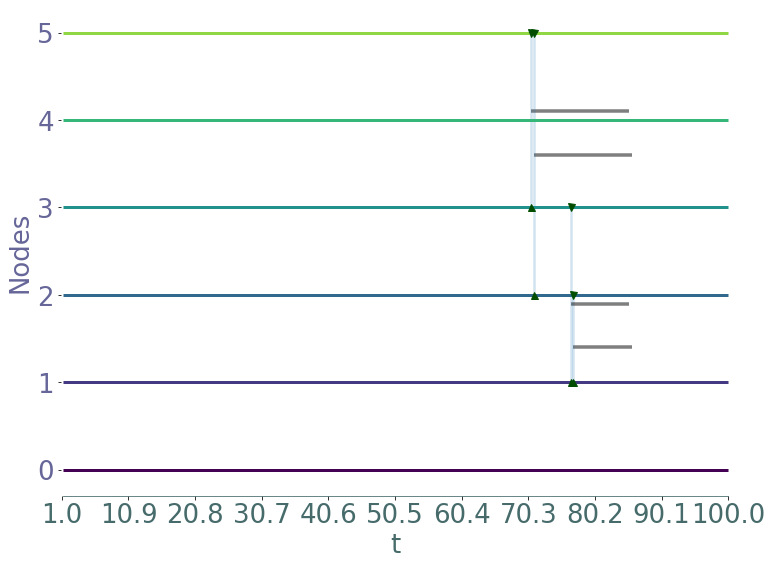

In [4]:
S.plot()

In [5]:
SS = S.stream_graph_to_link_stream()

In [6]:
SS.write_to_matthieu_link_stream("erdos")

In [7]:
betweenness, general_contri, nouveau, events, features = bt.betweenness_all(SS)

0
1
2
3
4
5


In [8]:
bt.simulations(SS, "papier")

0
1
2
3
4
5


In [9]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [10]:
import os
cmd = 'mv erdos_mat.ls archive_code/Test'
os.system(cmd)

0

In [11]:
import os
cmd = 'python2 archive_code/betweenness_all.py Test/erdos_mat.ls -1 res'
os.system(cmd)

0

In [12]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [13]:
bet_mat.keys()

dict_keys(['1', '3', '2', '5'])

In [14]:
bet_moi.keys()

dict_keys(['0', '1', '2', '3', '4', '5'])

In [15]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if bet_moi[v][t] != bet_mat[v.lower()][t]:
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

In [16]:
events

[1.1308940848602123,
 70.75854692767031,
 71.12462021087455,
 76.58710978380334,
 76.99483540499104,
 85.20753633756169,
 85.70629317822616,
 100.0]

In [17]:
#contribution check
node = 1

In [18]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/erdos_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
os.system(cmd)

0

In [19]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [20]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if general_contri[node][v][t].val != cont_mat[S.node_to_label[v].lower()][t]:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t].dim,general_contri[node][v][t].val,")" ,cont_mat[S.node_to_label[v].lower()][t])

In [21]:
cont_mat['b']

KeyError: 'b'

In [22]:
general_contri[0]

{0: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100.0: vol(0,0)},
 1: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100.0: vol(0,0)},
 2: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100.0: vol(0,0)},
 3: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100.0: vol(0,0)},
 4: {1.1308940848602123: vol(0,0),
 

In [23]:
SS.write_to_sg("examples/erdos")

In [24]:
SS.alpha

1.1308940848602123

In [127]:
SS.omega

100